In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Dataset Overview

In [3]:
df=pd.read_csv("diabetes.csv")

In [4]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


</b>Understanding the various columns:</b>

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure

SkinThickness: Triceps skin fold thickness

Insulin: 2-Hour serum insulin

BMI: Body mass index

DiabetesPedigreeFunction: Diabetes pedigree function

Age: in years

Outcome: Whether patient is diabetic (1) or not (0)

In [5]:
#we will check on how many observation are there in dataset
df.shape

(768, 9)

In [6]:
#we will check for overview of it
display(df.info(),df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data cleaning and preparation

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


observation-

As we can see minimum values for zero except for age and diabetespedigree function

In [8]:
#we will repleace 0 with null
#df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# EDA

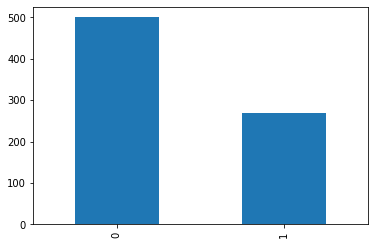

In [10]:
df['Outcome'].value_counts().plot(kind='bar')

In [11]:
#https://www.kaggle.com/anithajoslin/diabetes-eda-and-hypothesis-testing

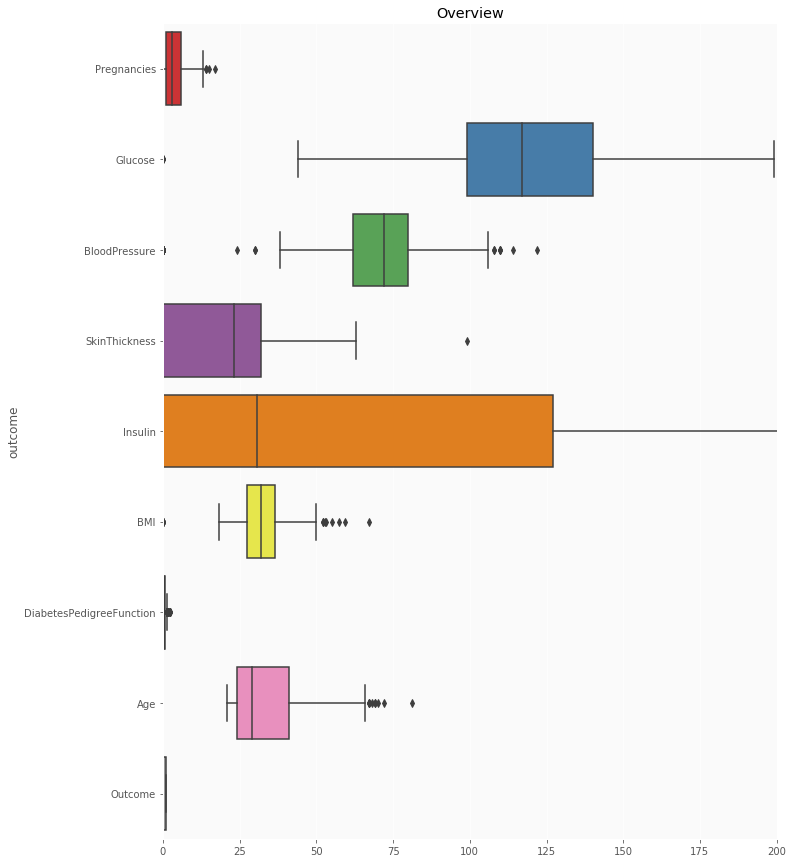

In [12]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('outcome')
plt.title("Overview")
ax = sns.boxplot(data =df,orient= 'h',palette = 'Set1')


In [13]:
#filling NA values with mean
#df.loc[:,'Glucose'].fillna(df.loc[:,'Glucose'].median(),inplace=True)
#df.loc[:,'BloodPressure'].fillna(df.loc[:,'BloodPressure'].median(),inplace=True)
#df.loc[:,'SkinThickness'].fillna(df.loc[:,'SkinThickness'].median(),inplace=True)
#df.loc[:,'BMI'].fillna(df.loc[:,'BMI'].median(),inplace=True)
#df.loc[:,'Insulin'].fillna(df.loc[:,'Insulin'].median(),inplace=True)

In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
import plotly.express as px
plt.figure(figsize=(10,5))
col = ['non diabetics','diabetics']
px.pie(df,values=df['Outcome'].value_counts(),names=col)

<Figure size 720x360 with 0 Axes>

observation-

we could see imbalance dataset

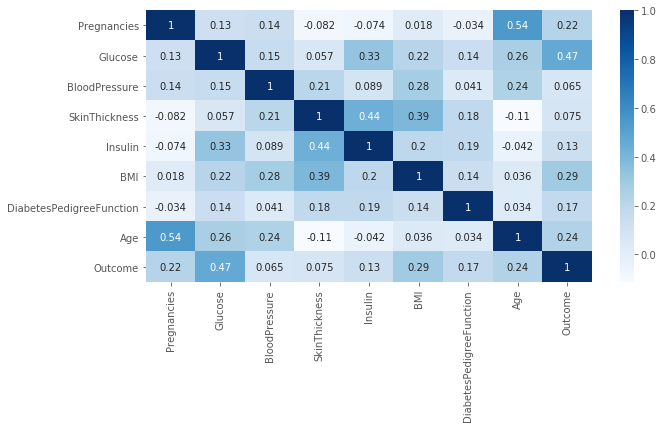

In [16]:
#correlation matrix which shows correlation between two sets of variables
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), cmap='Blues',annot=True)
plt.show()

observation-

Here we can see that values are mostly <=0.5 which implies that pair of respective variables are not strongly correlated

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012726953C08>,
      dtype=object)

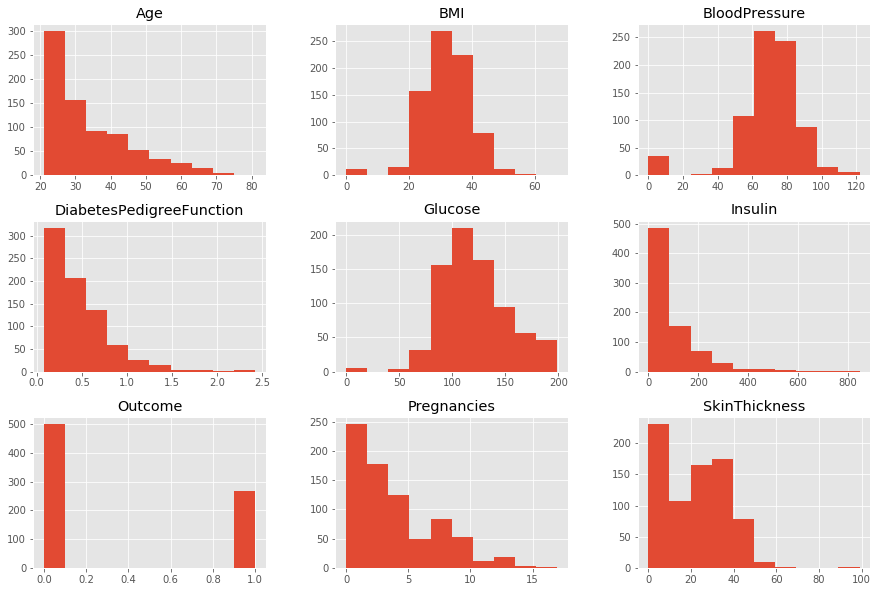

In [17]:
#plots to analyze data
#histogram to get to know about the distribution

df.hist(figsize=(15,10))

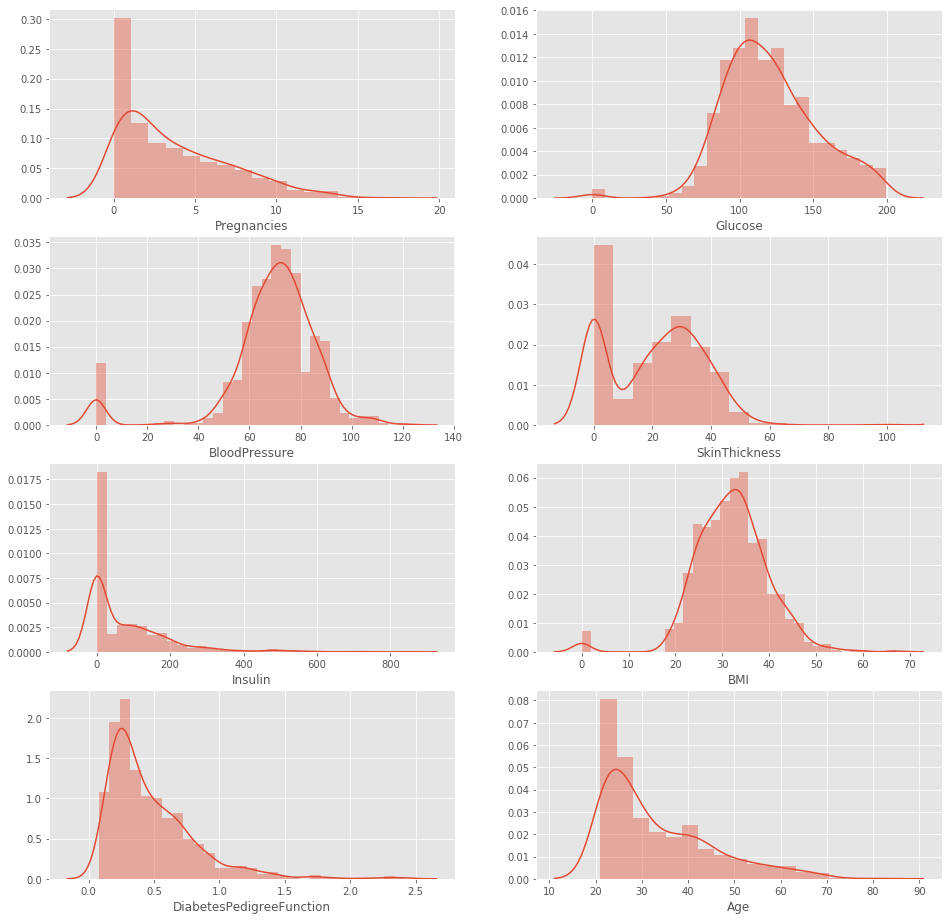

In [18]:
#distplot

fig, ax2 = plt.subplots(4, 2, figsize=(16, 16))
sns.distplot(df['Pregnancies'],ax=ax2[0][0])
sns.distplot(df['Glucose'],ax=ax2[0][1])
sns.distplot(df['BloodPressure'],ax=ax2[1][0])
sns.distplot(df['SkinThickness'],ax=ax2[1][1])
sns.distplot(df['Insulin'],ax=ax2[2][0])
sns.distplot(df['BMI'],ax=ax2[2][1])
sns.distplot(df['DiabetesPedigreeFunction'],ax=ax2[3][0])
sns.distplot(df['Age'],ax=ax2[3][1])

observation-

we can interpret that Glucose,BMI,BP are normally distributed. whereas rest are right skewed.

# train and test split

In [19]:
y=df.Outcome

In [20]:
x=df[df.columns[:-1]]

In [21]:
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.25,random_state=42,stratify=y)

In [22]:
print("xtrain",X_train.shape)
print("xtest",X_test.shape)
print("ytrain",y_train.shape)
print("ytest",y_test.shape)

xtrain (576, 8)
xtest (192, 8)
ytrain (576,)
ytest (192,)


In [23]:
#https://www.kaggle.com/pragyanbo/statistical-sidewalk-for-eda#Statistical-sidewalk-(A-dive-into-classical-statistics-for-EDA)

# Naive /bayes

In [24]:
model = GaussianNB()
fittedmodel = model.fit(X_train, y_train)
predi= fittedmodel.predict(X_test)

In [25]:
conf_matrix = confusion_matrix(predi, y_test)
acc_score = accuracy_score(predi,y_test)

In [26]:
conf_matrix

array([[96, 26],
       [29, 41]], dtype=int64)

In [27]:
acc_score

0.7135416666666666

# Logistics Regression

In [28]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_predicted = logReg.predict(X_test)

In [30]:
accuracy_score(y_predicted, y_test)

0.7291666666666666

In [31]:
confusion_matrix(y_predicted, y_test)

array([[105,  32],
       [ 20,  35]], dtype=int64)

# outlier Detection

In [32]:
from scipy.stats import norm,skew
df_p= df

Text(0.5, 1.0, 'skew: 0.8999119408414357')

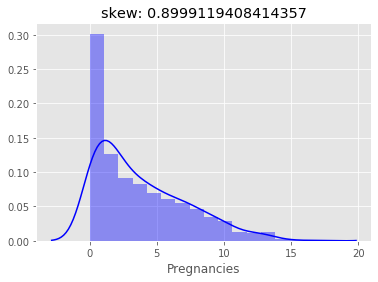

In [33]:
ax = sns.distplot(df_p['Pregnancies'], color="b")
plt.title('skew: {}'.format(skew(df_p['Pregnancies'])))

Q1= 1.0 Q3= 6.0 IQR= 5.0 low_limit= -6.5 high_limit= 13.5


Text(0.5, 1.0, 'skew: 0.8211407166019743')

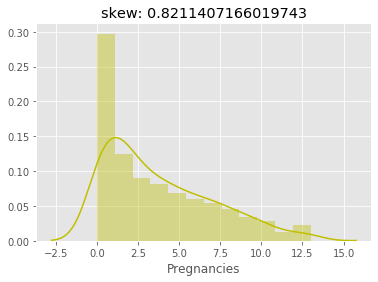

In [34]:
#as pregnancies column is skewd,we use IQR to detect outliers
Q1 = df_p['Pregnancies'].quantile(0.25)
Q3 = df_p['Pregnancies'].quantile(0.75)
IQR = Q3-Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((df_p['Pregnancies'] >= low_limit) & (df_p['Pregnancies'] <= high_limit))
df_p = df_p[filtered_entries]
print('Q1=',Q1,'Q3=',Q3,'IQR=',IQR,'low_limit=',low_limit,'high_limit=',high_limit)

#plot the new data after outliers removed.
ax = sns.distplot(df_p['Pregnancies'], color="y")
plt.title('skew: {}'.format(skew(df_p['Pregnancies'])))

Text(0.5, 1.0, 'skew: 0.17673187869330942')

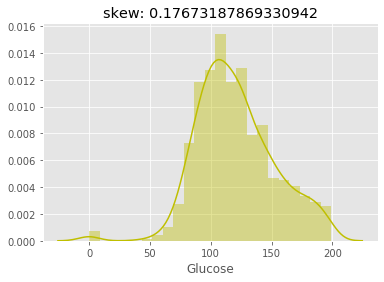

In [35]:
ax = sns.distplot(df_p['Glucose'], color="y")
plt.title('skew: {}'.format(skew(df_p['Glucose'])))

Text(0.5, 1.0, 'skew: 0.5357716521329466')

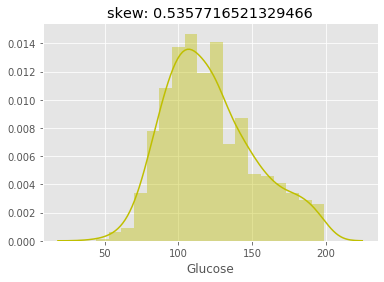

In [36]:
# using Z-Score as the data distribution is normal
from scipy import stats
z_scores = np.abs(stats.zscore(df_p['Glucose']))
filtered_entries = (z_scores < 3)
df_p= df_p[filtered_entries]

ax = sns.distplot(df_p['Glucose'], color="y")
plt.title('skew: {}'.format(skew(df_p['Glucose'])))

Text(0.5, 1.0, 'skew: -1.8352059125972198')

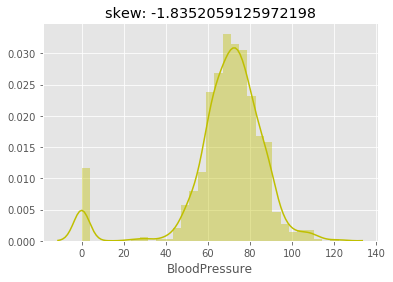

In [37]:
ax = sns.distplot(df_p['BloodPressure'], color="y")
plt.title('skew: {}'.format(skew(df_p['BloodPressure'])))

Text(0.5, 1.0, 'skew: 0.13501578760848384')

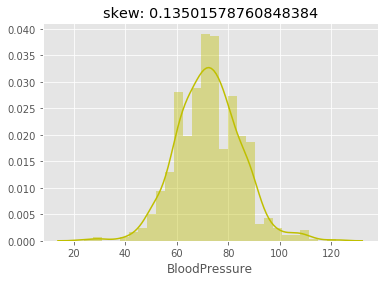

In [38]:
from scipy import stats
z_scores = np.abs(stats.zscore(df_p['BloodPressure']))
filtered_entries = (z_scores < 3)
df_p = df_p[filtered_entries]
ax = sns.distplot(df_p['BloodPressure'], color="y")
plt.title('skew: {}'.format(skew(df_p['BloodPressure'])))

Text(0.5, 1.0, 'skew: 0.06140328488279974')

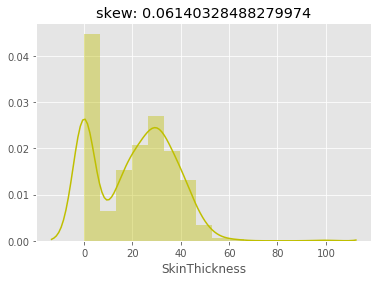

In [39]:
ax = sns.distplot(df['SkinThickness'], color="y")
plt.title('skew: {}'.format(skew(df_p['SkinThickness'])))

Text(0.5, 1.0, 'skew: -0.08929043766197266')

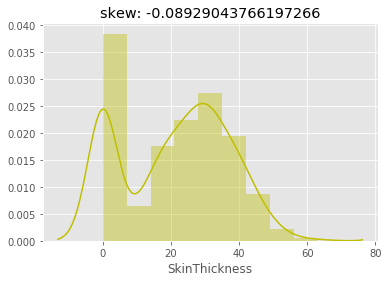

In [40]:
from scipy import stats
z_scores = np.abs(stats.zscore(df_p['SkinThickness']))
filtered_entries = (z_scores < 3)
df_p= df_p[filtered_entries]
ax = sns.distplot(df_p['SkinThickness'], color="y")
plt.title('skew: {}'.format(skew(df_p['SkinThickness'])))

Text(0.5, 1.0, 'skew: 2.2031491483303123')

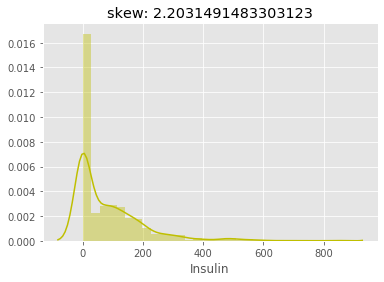

In [41]:
ax = sns.distplot(df_p['Insulin'], color="y")
plt.title('skew: {}'.format(skew(df_p['Insulin'])))

Q1= 0.0 Q3= 130.0 IQR= 130.0 low_limit= -195.0 high_limit= 325.0


Text(0.5, 1.0, 'skew: 1.061569063519779')

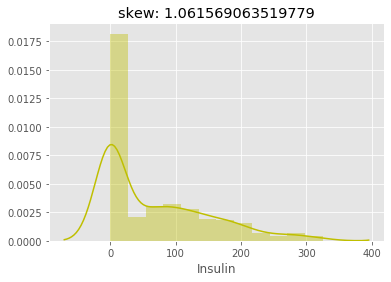

In [42]:
# Using IQR as data distribution is skewed
Q1 = df_p['Insulin'].quantile(0.25)
Q3 = df_p['Insulin'].quantile(0.75)
IQR = Q3-Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
print('Q1=',Q1,'Q3=',Q3,'IQR=',IQR,'low_limit=',low_limit,'high_limit=',high_limit)
filtered_entries = ((df_p['Insulin'] >= low_limit) & (df_p['Insulin'] <= high_limit))
df_p= df_p[filtered_entries]
ax = sns.distplot(df_p['Insulin'], color="y")
plt.title('skew: {}'.format(skew(df_p['Insulin'])))

Text(0.5, 1.0, 'skew: 0.09981382078599434')

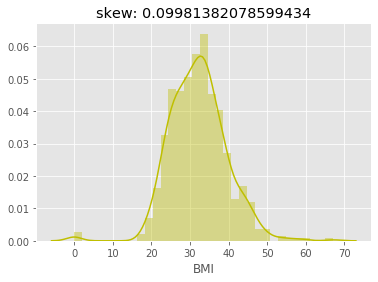

In [43]:
ax = sns.distplot(df_p['BMI'], color="y")
plt.title('skew: {}'.format(skew(df_p['BMI'])))

Text(0.5, 1.0, 'skew: 0.34236536740551604')

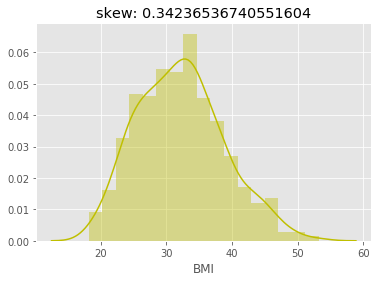

In [44]:
from scipy import stats
z_scores = np.abs(stats.zscore(df_p['BMI']))
filtered_entries = (z_scores < 3)
df_p = df_p[filtered_entries]
ax = sns.distplot(df_p['BMI'], color="y")
plt.title('skew: {}'.format(skew(df_p['BMI'])))

Text(0.5, 1.0, 'skew: 1.595358281664109')

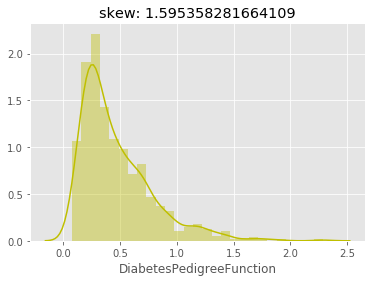

In [45]:
ax = sns.distplot(df_p['DiabetesPedigreeFunction'], color="y")
plt.title('skew: {}'.format(skew(df_p['DiabetesPedigreeFunction'])))

Q1= 0.245 Q3= 0.614 IQR= 0.369 low_limit= -0.3085 high_limit= 1.1675


Text(0.5, 1.0, 'skew: 0.903432184579501')

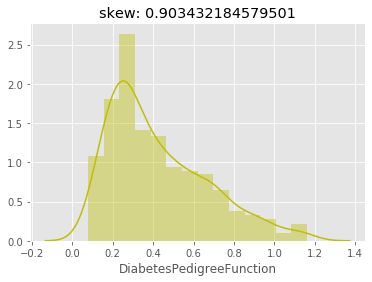

In [46]:
# Using IQR as data distribution is skewed
Q1 = df_p['DiabetesPedigreeFunction'].quantile(0.25)
Q3 = df_p['DiabetesPedigreeFunction'].quantile(0.75)
IQR = Q3-Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
print('Q1=',Q1,'Q3=',Q3,'IQR=',IQR,'low_limit=',low_limit,'high_limit=',high_limit)
filtered_entries = ((df_p['DiabetesPedigreeFunction'] >= low_limit) & (df_p['DiabetesPedigreeFunction'] <= high_limit))
df_p = df_p[filtered_entries]
ax = sns.distplot(df_p['DiabetesPedigreeFunction'], color="y")
plt.title('skew: {}'.format(skew(df_p['DiabetesPedigreeFunction'])))

Text(0.5, 1.0, 'skew: 1.1300707038084048')

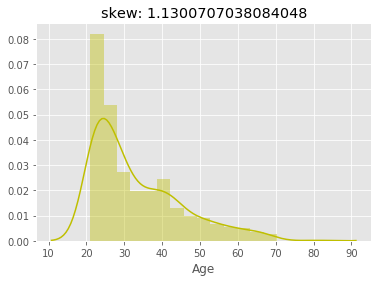

In [47]:
ax = sns.distplot(df_p['Age'], color="y")
plt.title('skew: {}'.format(skew(df_p['Age'])))

Q1= 24.0 Q3= 40.25 IQR= 16.25 low_limit= -0.375 high_limit= 64.625


Text(0.5, 1.0, 'skew: 0.978307970010861')

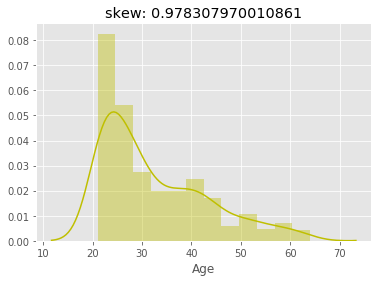

In [48]:
# Using IQR as data distribution is skewed
Q1 = df_p['Age'].quantile(0.25)
Q3 = df_p['Age'].quantile(0.75)
IQR = Q3-Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
print('Q1=',Q1,'Q3=',Q3,'IQR=',IQR,'low_limit=',low_limit,'high_limit=',high_limit)
filtered_entries = ((df_p['Age'] >= low_limit) & (df_p['Age'] <= high_limit))
df_p= df_p[filtered_entries]
ax = sns.distplot(df_p['Age'], color="y")
plt.title('skew: {}'.format(skew(df_p['Age'])))

In [49]:
print(df.shape)
print(df_p.shape)

(768, 9)
(642, 9)


In [50]:
df_final=df_p

print(df_final['Outcome'].value_counts())
x = df_final[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df_final['Outcome']

0    439
1    203
Name: Outcome, dtype: int64


In [53]:
from sklearn.preprocessing import StandardScaler
Std = StandardScaler()
dfX = pd.DataFrame(Std.fit_transform(x),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])

In [54]:
dfX.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02
mean,3.673074e-16,2.282702e-17,4.810102e-16,-1.584057e-16,1.487215e-17,9.339189e-16,2.795445e-16,1.286614e-16
std,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00
min,-1.163148e+00,-2.576015e+00,-3.992878e+00,-1.360267e+00,-8.284294e-01,-2.117914e+00,-1.422515e+00,-1.072696e+00
25%,-8.571068e-01,-6.853274e-01,-6.836281e-01,-1.360267e+00,-8.284294e-01,-7.230848e-01,-7.678084e-01,-7.915297e-01
50%,-2.450238e-01,-1.696853e-01,-2.177816e-02,1.397854e-01,-3.341548e-01,-2.567011e-02,-2.706403e-01,-3.229184e-01
75%,6.731005e-01,6.123718e-01,6.400718e-01,7.267624e-01,6.360879e-01,6.262610e-01,6.439036e-01,7.080264e-01
max,2.815391e+00,2.717910e+00,4.114784e+00,2.552913e+00,3.137972e+00,3.188502e+00,3.013125e+00,2.957360e+00


In [55]:
X = dfX[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df_p['Outcome']

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)
X_train.shape

(449, 8)

In [57]:
from sklearn.model_selection import GridSearchCV
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [58]:
grid_search = GridSearchCV(logReg, param_grid, cv=5, verbose=True, n_jobs=-1)
best_model = grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 3872 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 8000 out of 8000 | elapsed:   48.4s finished


In [59]:
best_model.best_params_

{'C': 0.08858667904100823,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [60]:
accuracy = best_model.best_score_
accuracy

0.7795006242197252

In [61]:
y_pred = best_model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7875647668393783


# KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
param_grid = [    
    {'n_neighbors':[5,6,7,8,9,10,11],
     'leaf_size':[1,2,3,5],
     'weights':['uniform', 'distance'],
     'algorithm':['auto', 'ball_tree','kd_tree','brute']
    }
]

In [66]:
grid_search = GridSearchCV(knn, param_grid, cv=5, verbose=True, n_jobs=-1)
best_model = grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 224 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 1072 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed:   33.4s finished


In [67]:
best_model.best_params_

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 10, 'weights': 'distance'}

In [68]:
accuracy = best_model.best_score_
accuracy

0.7684394506866417

In [69]:
y_pred = best_model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7409326424870466


# Descison tree

In [72]:
param_grid = [    
    {'criterion':['gini','entropy'],
     'splitter':['best','random'],
     'max_features':['auto','sqrt','log2']
    }
]
from sklearn.tree import DecisionTreeClassifier 
dt=DecisionTreeClassifier()

In [73]:
grid_search = GridSearchCV(dt, param_grid, cv=5, verbose=True, n_jobs=-1)
best_model = grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished


In [74]:
best_model.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'best'}

In [75]:
accuracy = best_model.best_score_
accuracy

0.7216229712858928

In [77]:
y_pred = best_model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7357512953367875


# Result

In [ ]:
1) Logistics regression performs well than other models.

2)we could impute median or mean values to fill 0 values.

3)In Future,will update ROCAUC and kcross validation.